# Machine Learning Lab Project

Submitted by<br>Amrit Majumder - 18MCMI01<br>Delton M Antony - 18MCMI05<br>Ashutosh Mahawar - 18MCMI23

# Aim

To explore Fact Extraction and Verification data and do EDA and modeling on it.

# Requirements

Python3.7<br>Anaconda 5

Note: As a prerequisite, we have used the extracted data from<br>https://github.com/cdmalon/fever2018-retrieval/tree/90a07fe85b418de5ab62de8eaa2572df0d93f51e
by using<br> $ bash scripts/download-processed-wiki.sh which downloads the 4.1 GB data. Here I am using only titles as input for EDA and classification scraped from the data into csv. Files can be found in the data folder in the root directory of this project.<br>Credits to the github user cdmalon https://github.com/cdmalon

The following notebook is under the assumption that we already have the title dataset scraped by cdmalon (link above)

# Procedure

Reading the data

In [75]:
import pandas as pd
# Fake news
df_onion = pd.read_csv('./data/the_onion.csv')
# Genuine News
df_not_onion = pd.read_csv('./data/not_onion.csv')

In [76]:
fake_dataset = df_onion.rename(index=str, columns={"subreddit": "target"})

In [77]:
fake_dataset = fake_dataset.drop('target', axis=1)

In [78]:
fake_dataset['fake'] = 1

In [79]:
fake_dataset.head()

,Unnamed: 0,author,domain,num_comments,score,timestamp,title,fake
0,0,Kotaay,google.ca,1,1,1554658622,Jack Nicholson Banned From Sitting Courtside A...,1
1,1,DisastrousCandy3,theonion.com,3,1,1554600149,NicoDerm Introduces New Nicotine Eye Patch,1
2,2,SlovenianCat,youtu.be,0,1,1554585700,Last Bastion Of U.S. Economy Succumbs To Pancr...,1
3,3,MyNameIsGriffon,sports.theonion.com,0,386,1554559311,Tom Izzo Calls 2019 Spartans Best Team He’s Ev...,1
4,4,MyNameIsGriffon,theonion.com,0,3,1554501708,House Democrats Formally Request Trump’s Tax R...,1


In [80]:
fake_dataset.to_csv('fake_data.csv')

In [82]:
# previewing the genuine news
df_not_onion.head()

,Unnamed: 0,author,domain,num_comments,score,subreddit,timestamp,title
0,0,drak0bsidian,cnn.com,0,1,nottheonion,1554663925,Suspected rhino poacher is killed by an elepha...
1,1,somefaces,nypost.com,1,1,nottheonion,1554663648,Taliban commander turns himself in to collect ...
2,2,Sombez,nytimes.com,1,1,nottheonion,1554663558,Rhino Poacher Killed by Elephant and Eaten by ...
3,3,Bayou-Maharaja,ktoo.org,0,1,nottheonion,1554662778,Young shoves female reporter on way to Violenc...
4,4,phantommaster1999,buzz.ie,1,1,nottheonion,1554661988,Poacher hunting rhinos trampled to death by el...


In [83]:
# Previewing the shape of the two datasets
genuine_dataset = df_not_onion.drop('subreddit', axis=1)

In [84]:
genuine_dataset['fake'] = 0

In [88]:
genuine_dataset.head()

,Unnamed: 0,author,domain,num_comments,score,timestamp,title,fake
0,0,drak0bsidian,cnn.com,0,1,1554663925,Suspected rhino poacher is killed by an elepha...,0
1,1,somefaces,nypost.com,1,1,1554663648,Taliban commander turns himself in to collect ...,0
2,2,Sombez,nytimes.com,1,1,1554663558,Rhino Poacher Killed by Elephant and Eaten by ...,0
3,3,Bayou-Maharaja,ktoo.org,0,1,1554662778,Young shoves female reporter on way to Violenc...,0
4,4,phantommaster1999,buzz.ie,1,1,1554661988,Poacher hunting rhinos trampled to death by el...,0


In [89]:
genuine_dataset.to_csv('genuine_data.csv')

In [90]:
dataset = fake_dataset.append(genuine_dataset, ignore_index=True)

In [91]:
dataset.head()

,Unnamed: 0,author,domain,num_comments,score,timestamp,title,fake
0,0,Kotaay,google.ca,1,1,1554658622,Jack Nicholson Banned From Sitting Courtside A...,1
1,1,DisastrousCandy3,theonion.com,3,1,1554600149,NicoDerm Introduces New Nicotine Eye Patch,1
2,2,SlovenianCat,youtu.be,0,1,1554585700,Last Bastion Of U.S. Economy Succumbs To Pancr...,1
3,3,MyNameIsGriffon,sports.theonion.com,0,386,1554559311,Tom Izzo Calls 2019 Spartans Best Team He’s Ev...,1
4,4,MyNameIsGriffon,theonion.com,0,3,1554501708,House Democrats Formally Request Trump’s Tax R...,1


In [92]:
dataset2 = dataset

In [93]:
dataset2 = dataset2.drop(dataset2.columns[0], axis=1)

In [94]:
dataset2 = dataset2.drop('num_comments', axis=1)

In [95]:
dataset2.head()

,author,domain,score,timestamp,title,fake
0,Kotaay,google.ca,1,1554658622,Jack Nicholson Banned From Sitting Courtside A...,1
1,DisastrousCandy3,theonion.com,1,1554600149,NicoDerm Introduces New Nicotine Eye Patch,1
2,SlovenianCat,youtu.be,1,1554585700,Last Bastion Of U.S. Economy Succumbs To Pancr...,1
3,MyNameIsGriffon,sports.theonion.com,386,1554559311,Tom Izzo Calls 2019 Spartans Best Team He’s Ev...,1
4,MyNameIsGriffon,theonion.com,3,1554501708,House Democrats Formally Request Trump’s Tax R...,1


In [96]:
dataset2.tail()

,author,domain,score,timestamp,title,fake
29863,Icy9kills,yahoo.com,1,1548378526,Family kicked off of plane because of their bo...,0
29864,EternalTryhard,dw.com,1,1548378483,Russia's Putin and Japan's Abe try to end Worl...,0
29865,MassBurst730,cnn.com,1,1548378466,Daily fried chicken serving linked to 13% high...,0
29866,TriumphantSon,eurogamer.net,1,1548378167,Farming simulator starts up esports with 250k ...,0
29867,treesbark,independent.co.uk,1,1548378009,MARK ZUCKERBERG 'KILLED GOAT WITH LASER GUN AN...,0


In [97]:
dataset2.to_csv('merged_data.csv')

If you are already having the merged_data.csv which I made, you only need to start executing from here. Everything else can be commented out.

In [104]:
dataset = pd.read_csv('merged_data.csv')

In [105]:
dataset.head()

,Unnamed: 0,author,domain,score,timestamp,title,fake
0,0,Kotaay,google.ca,1,1554658622,Jack Nicholson Banned From Sitting Courtside A...,1
1,1,DisastrousCandy3,theonion.com,1,1554600149,NicoDerm Introduces New Nicotine Eye Patch,1
2,2,SlovenianCat,youtu.be,1,1554585700,Last Bastion Of U.S. Economy Succumbs To Pancr...,1
3,3,MyNameIsGriffon,sports.theonion.com,386,1554559311,Tom Izzo Calls 2019 Spartans Best Team He’s Ev...,1
4,4,MyNameIsGriffon,theonion.com,3,1554501708,House Democrats Formally Request Trump’s Tax R...,1


Cleaning the data

In order to remove bias, we need to clean the data - remove duplicate articles, remove punctuation marks, remove numbers, remove double spaces and make all text lowercase

In [106]:
def clean_data(dataframe):
    # Drop duplicate rows
    dataframe.drop_duplicates(subset='title', inplace=True)
    # Remove punctation
    dataframe['title'] = dataframe['title'].str.replace('[^\w\s]',' ')
    # Remove numbers 
    dataframe['title'] = dataframe['title'].str.replace('[^A-Za-z]',' ')
    # Make sure any double-spaces are single 
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')
    # Transform all text to lowercase
    dataframe['title'] = dataframe['title'].str.lower()
    print("New shape:", dataframe.shape)
    return dataframe.head()

In [107]:
clean_data(dataset)

New shape: (26262, 7)


,Unnamed: 0,author,domain,score,timestamp,title,fake
0,0,Kotaay,google.ca,1,1554658622,jack nicholson banned from sitting courtside a...,1
1,1,DisastrousCandy3,theonion.com,1,1554600149,nicoderm introduces new nicotine eye patch,1
2,2,SlovenianCat,youtu.be,1,1554585700,last bastion of u s economy succumbs to pancre...,1
3,3,MyNameIsGriffon,sports.theonion.com,386,1554559311,tom izzo calls spartans best team he s ever t...,1
4,4,MyNameIsGriffon,theonion.com,3,1554501708,house democrats formally request trump s tax r...,1


Check for null values

In [108]:
pd.DataFrame([df_onion.isnull().sum()], index=["dataSet"]).T

,dataSet
Unnamed: 0,0
author,0
domain,0
num_comments,0
score,0
subreddit,0
timestamp,0
title,0


There are no null values

# Exploratory Data Analysis

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

Bar Plot Function

In [111]:
def bar_plot(x, y, title, color):    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g
    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)
    # Enable bar values
    totals = []
    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

Most active authors fake news and articles

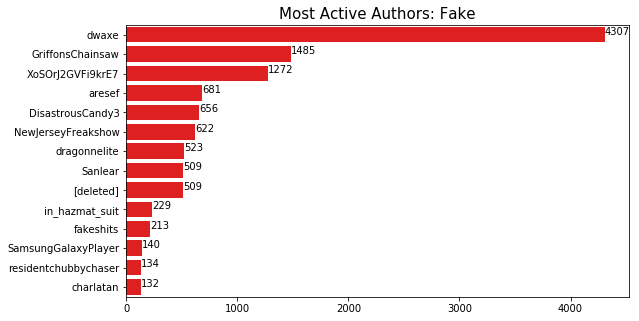

In [112]:
df_fake_authors = fake_dataset['author'].value_counts() 
df_fake_authors = df_fake_authors[df_fake_authors > 100].sort_values(ascending=False)
# Set y values: Authors 
df_fake_authors_index = list(df_fake_authors.index)
# Call function
bar_plot(df_fake_authors.values, df_fake_authors_index, 'Most Active Authors: Fake', 'r')

Most active authors of non fake news and articles

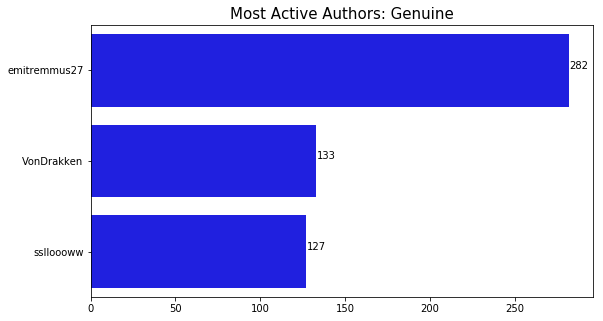

In [113]:
# Set x values: # of posts
df_not_fake_authors = genuine_dataset['author'].value_counts() 
df_not_fake_authors = df_not_fake_authors[df_not_fake_authors > 100].sort_values(ascending=False)

# Set y values: Authors
df_not_fake_authors_index = list(df_not_fake_authors.index)

# Call function
bar_plot(df_not_fake_authors.values, df_not_fake_authors_index, 'Most Active Authors: Genuine','b')


Most referenced domains of Fake news and articles

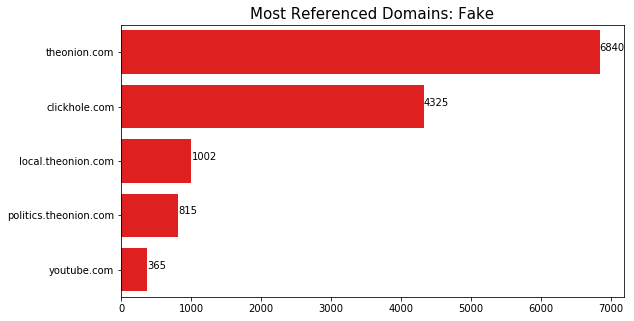

In [114]:
# Set x values: # of posts
df_fake_domain = fake_dataset['domain'].value_counts()
df_fake_domain = df_fake_domain.sort_values(ascending=False).head(5)
# Set y values: Domains
df_fake_domain_index = list(df_fake_domain.index)
# Call function
bar_plot(df_fake_domain.values, df_fake_domain_index, 'Most Referenced Domains: Fake', 'r')

Most referenced domains of genuine news and articles

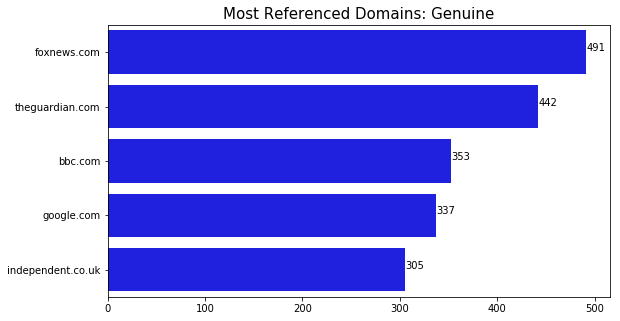

In [115]:
# Set x values: # of posts greater than 100
df_not_fake_domain = genuine_dataset['domain'].value_counts() 
df_not_fake_domain = df_not_fake_domain.sort_values(ascending=False).head(5)
# Set y values: Names of authors 
df_not_fake_domain_index = list(df_not_fake_domain.index)
# Call function
bar_plot(df_not_fake_domain.values, df_not_fake_domain_index, 'Most Referenced Domains: Genuine', 'b')

# Natural Language Processing

In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26262 entries, 0 to 29867
Data columns (total 7 columns):
Unnamed: 0    26262 non-null int64
author        26262 non-null object
domain        26262 non-null object
score         26262 non-null int64
timestamp     26262 non-null int64
title         26262 non-null object
fake          26262 non-null int64
dtypes: int64(4), object(3)
memory usage: 1.6+ MB


In [117]:
nlp_dataset = dataset.drop(['author', 'domain', 'score', 'timestamp'], axis=1)

In [122]:
nlp_dataset = nlp_dataset.drop(nlp_dataset.columns[0], axis=1)

In [127]:
nlp_dataset = nlp_dataset.reset_index(drop=True)
nlp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26262 entries, 0 to 26261
Data columns (total 2 columns):
title    26262 non-null object
fake     26262 non-null int64
dtypes: int64(1), object(1)
memory usage: 410.4+ KB


Applying count vectorizer

In [128]:
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

I have no other choice but to drop a lot of data as my computer is not supporting this size which is meant to be run on supercomputers. See Line 6 of the following code segment.

Count Vectorize when fake is 1

In [201]:
mask_on = dataset['fake'] == 1
df_fake_titles = dataset[mask_on]['title']
# Im only taking first 2000 entries
# Else it gives memory error
# As this project is meant to be run on a damn cluster
df_fake_titles = df_fake_titles.head(5000) # dropping the rest of the bazillion points of data
# Instantiate a CountVectorizer
cv1 = CountVectorizer(stop_words = 'english')
# Fit and transform the vectorizer on our corpus
fake_cvec = cv1.fit_transform(df_fake_titles)
# Convert onion_cvec into a DataFrame
fake_cvec_df = pd.DataFrame(fake_cvec.toarray(),
                            columns=cv1.get_feature_names())

# Inspect head of Fake Titles cvec
print(fake_cvec_df.shape)

(5000, 11276)


Count Vectorize when fake is 0

In [203]:
# Set variables to show Genuine Titles
mask_no = dataset['fake'] == 0
df_not_fake_titles = dataset[mask_no]['title']
# Again, a conventional laptop doesnt support np.toarray() thousands of text data at once
# Hence, dropping a few thousand more of the data
df_not_fake_titles = df_not_fake_titles.head(5000) # Again, I dont have a supercomputer and I'm lazy to do it even if I had one
# Instantiate a CountVectorizer
cv2 = CountVectorizer(stop_words = 'english')

# Fit and transform the vectorizer on our corpus
not_fake_cvec = cv2.fit_transform(df_not_fake_titles)

# Convert onion_cvec into a DataFrame
not_fake_cvec_df = pd.DataFrame(not_fake_cvec.toarray(),
                                columns=cv2.get_feature_names())

# Inspect head of Not Onion Titles cvec
print(not_fake_cvec_df.shape)

(5000, 8955)


Fake: Top 5 unigrams

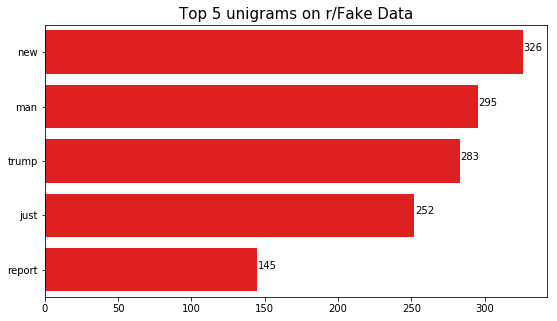

In [204]:
# Set up variables to contain top 5 most used words in Fake
fake_wc = fake_cvec_df.sum(axis = 0)
fake_top_5 = fake_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(fake_top_5.values, fake_top_5.index, 'Top 5 unigrams on r/Fake Data','r')

Genuine: Top 5 unigrams

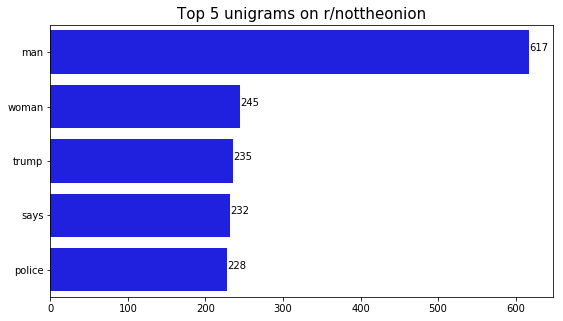

In [206]:
# Set up variables to contain top 5 most used words in Onion
nfake_wc = not_fake_cvec_df.sum(axis = 0)
nfake_top_5 = nfake_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(nfake_top_5.values, nfake_top_5.index, 'Top 5 unigrams on r/not Fake','b')

Common Unigrams

In [207]:
not_fake_5_set = set(nfake_top_5.index)
fake_5_set = set(fake_top_5.index)

# Return common words
common_unigrams = fake_5_set.intersection(not_fake_5_set)
common_unigrams

{'man', 'trump'}

Now set ngram range as 2 to get most used phrase of word length 2

Count vectorize when fake = 1`

In [218]:
# Set variables to show Fake Titles
mask = dataset['fake'] == 1
df_fake_titles = dataset[mask]['title']
df_fake_titles = df_fake_titles.head(2500)

# Instantiate a CountVectorizer
cv = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

# Fit and transform the vectorizer on our corpus
fake_cvec = cv.fit_transform(df_fake_titles)

# Convert onion_cvec into a DataFrame
fake_cvec_df = pd.DataFrame(fake_cvec.toarray(),
                   columns=cv.get_feature_names())

# Inspect head of Fake Titles cvec
print(fake_cvec_df.shape)

(2500, 15869)


Count Vectorize when fake = 0

In [245]:
# Set variables to show Genuine Titles
mask = dataset['fake'] == 0
df_not_fake_titles = dataset[mask]['title']
df_not_fake_titles = df_not_fake_titles.head(2500)
# Instantiate a CountVectorizer
cv = CountVectorizer(stop_words = 'english', ngram_range=(2,2))
# Fit and transform the vectorizer on our corpus
not_fake_cvec = cv.fit_transform(df_not_fake_titles)
# Convert onion_cvec into a DataFrame
not_fake_cvec_df = pd.DataFrame(not_fake_cvec.toarray(),
                                columns=cv.get_feature_names())
# Inspect head of Not Fake Titles cvec
print(not_fake_cvec_df.shape)

(2500, 13097)


Top 5 Fake bigrams

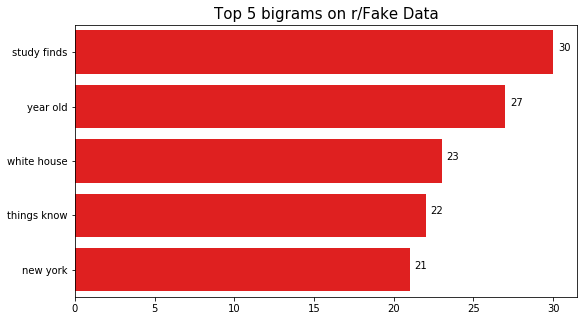

In [246]:
fake_wc = fake_cvec_df.sum(axis = 0)
fake_top_5 = fake_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(fake_top_5.values, fake_top_5.index, 'Top 5 bigrams on r/Fake Data', 'r')

Top 5 Genuine Bigrams

In [ ]:
n_wc = not_onion_cvec_df.sum(axis = 0)
nonion_top_5 = nonion_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(nonion_top_5.values, nonion_top_5.index, 'Top 5 bigrams on r/nottheonion','b')